In [1]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

## Input

In [15]:
width,height = 243,320

In [2]:
PATH = 'yalefaces/'

In [3]:
for dir_name,_,filenames in os.walk(PATH):
    print(dir_name)

yalefaces/


In [4]:
sub14 = [i for i in filenames if '14' in i]
sub1 = [i for i in filenames if '01' in i]

In [5]:
sub14

['subject14.happy.gif',
 'subject14-test.gif',
 'subject14.rightlight.gif',
 'subject14.sad.gif',
 'subject14.leftlight.gif',
 'subject14.wink.gif',
 'subject14.normal.gif',
 'subject14.noglasses.gif',
 'subject14.glasses.gif',
 'subject14.sleepy.gif']

In [6]:
sub1

['subject01.happy.gif',
 'subject01.surprised.gif',
 'subject01.noglasses.gif',
 'subject01-test.gif',
 'subject01.glasses.gif',
 'subject01.normal.gif',
 'subject01.sad.gif',
 'subject01.wink.gif',
 'subject01.leftlight.gif',
 'subject01.rightlight.gif',
 'subject01.sleepy.gif']

In [7]:
test_sub14 = 'subject14-test.gif'
sub14.remove('subject14-test.gif')

sub1.remove('subject01-test.gif')
test_sub1 = 'subject01-test.gif'

In [8]:
train14 = [np.array(Image.open(PATH+i)).flatten() for i in sub14]
train1 = [np.array(Image.open(PATH+i)).flatten() for i in sub1]

In [9]:
print(train1[1].shape)
print(train14[0].shape)

(77760,)
(77760,)


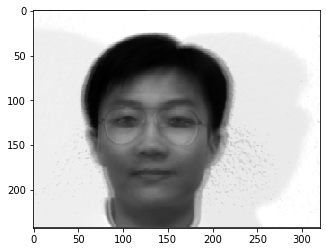

In [10]:
mean_face14 = np.zeros((243*320))

for i in train14:
    mean_face14 = np.add(mean_face14,i)

mean_face14 /= len(train14)

plt.imshow(mean_face14.reshape(243,320), cmap='gray')
plt.show()

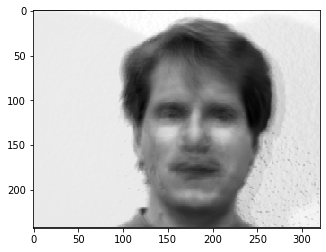

In [12]:
mean_face1 = np.zeros((243*320))

for i in train1:
    mean_face1 = np.add(mean_face1,i)

mean_face1 /= len(train1)

plt.imshow(mean_face1.reshape(243,320), cmap='gray')
plt.show()

In [ ]:
vec14 = np.array(train14)
vec1 = np.array(train1)

## Normalized face

In [13]:
normalised14 = np.ndarray(shape=(len(train14),243*320 ))

for i in range(len(train14)):
    normalised14[i] = np.subtract(train14[i],mean_face14)

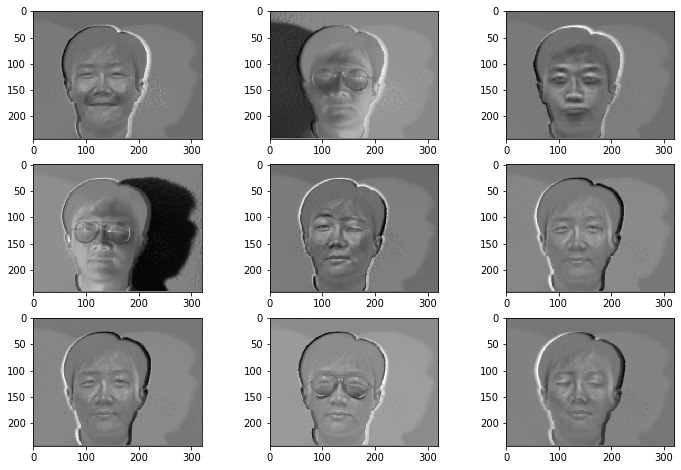

In [19]:
f,ax = plt.subplots(3,3,figsize=(12,8))
ax = ax.ravel()
for i in range(len(train14)):
    img = normalised14[i].reshape(243,320)
    ax[i].imshow(img, cmap='gray')

In [14]:
normalised1 = np.ndarray(shape=(len(train1),243*320 ))

for i in range(len(train1)):
    normalised1[i] = np.subtract(train1[i],mean_face1)

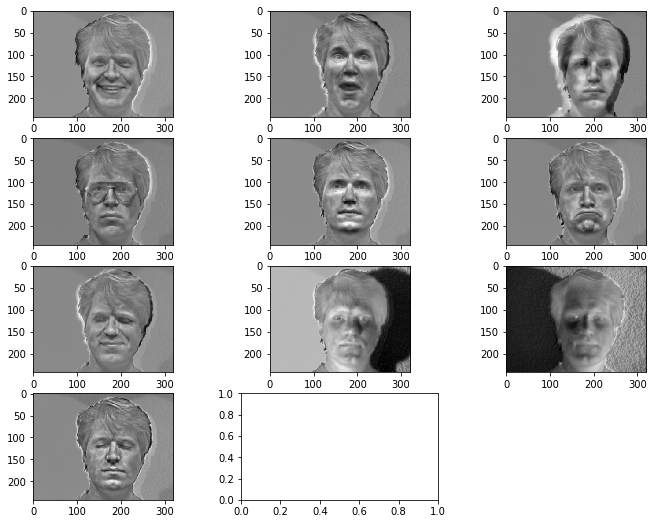

In [22]:
f,ax = plt.subplots(4,3,figsize=(12,9))
ax = ax.ravel()
for i in range(len(train1)):
    img = normalised1[i].reshape(243,320)
    ax[i].imshow(img, cmap='gray')
    
f.delaxes(ax[-1])
f.delaxes(ax[-1])